<a href="https://colab.research.google.com/github/Nayana-manoharan/DeepLearning/blob/main/ResNet50_Hand_written_digits_prediction1_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Lambda,Dropout
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

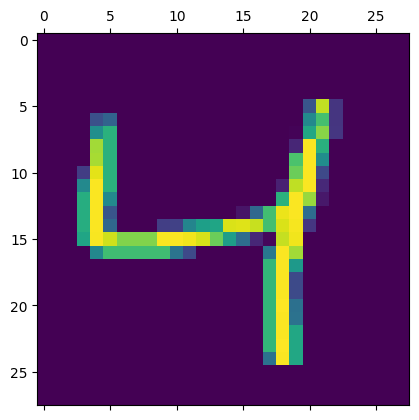

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the model
model = Sequential([
    # Reshape and convert grayscale to RGB
    Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(tf.expand_dims(x, axis=-1), (224, 224)))),

    # Add the pre-trained MobileNetV2 model
    base_model,

    # Flatten the output
    Flatten(),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 204s 100ms/step - accuracy: 0.3539 - loss: 1.9137 - val_accuracy: 0.8448 - val_loss: 0.7398
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 179s 93ms/step - accuracy: 0.7408 - loss: 0.9002 - val_accuracy: 0.9148 - val_loss: 0.3709
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 157s 93ms/step - accuracy: 0.8274 - loss: 0.5927 - val_accuracy: 0.9363 - val_loss: 0.2512
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 202s 93ms/step - accuracy: 0.8706 - loss: 0.4461 - val_accuracy: 0.9467 - val_loss: 0.2061
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 202s 93ms/step - accuracy: 0.8926 - loss: 0.3728 - val_accuracy: 0.9505 - val_loss: 0.1742
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 163s 96ms/step - accuracy: 0.9064 - loss: 0.3186 - val_accuracy: 0.9512 - val_loss: 0.1648
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 202s 97ms/step - accuracy: 0.9172 - loss: 0.2884 - val_accuracy: 0.9583 - val_loss: 0.1403
Epoch 8/10
1688/1

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9631


In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step


array([1.7105908e-08, 5.5217731e-07, 4.5489860e-06, 8.0867113e-07,
       1.2802286e-07, 1.5938042e-08, 6.0373186e-09, 9.9998713e-01,
       2.1924093e-06, 4.6163668e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
y_test[:5]

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    5,    1,    0,    1,    6,    1,    0,    0],
       [   0, 1123,    6,    0,    0,    1,    2,    1,    1,    1],
       [   2,    0,  990,    6,    4,    0,    6,   13,   10,    1],
       [   0,    0,    4,  977,    0,   11,    0,    8,    9,    1],
       [   2,    3,    2,    0,  949,    0,    2,    2,    2,   20],
       [   1,    0,    1,   25,    0,  856,    3,    1,    5,    0],
       [   6,    3,    1,    0,    5,    8,  930,    0,    5,    0],
       [   0,    4,   17,    4,    1,    1,    0,  988,    2,   11],
       [   8,    1,   12,    9,    2,   19,    1,    7,  904,   11],
       [   8,    1,    2,    9,    6,    4,    0,   26,    5,  948]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

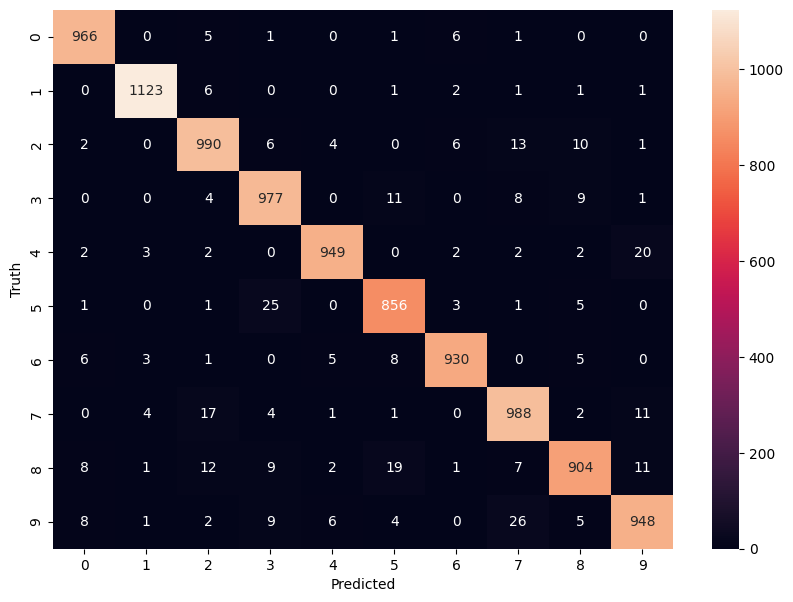

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Fine-tuning
# Unfreeze the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),  # Lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=5,
                         validation_split=0.1,
                         verbose=1)



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 228s 123ms/step - accuracy: 0.8313 - loss: 0.5577 - val_accuracy: 0.9712 - val_loss: 0.0886
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 235s 112ms/step - accuracy: 0.9490 - loss: 0.1671 - val_accuracy: 0.9785 - val_loss: 0.0683
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 210s 117ms/step - accuracy: 0.9631 - loss: 0.1243 - val_accuracy: 0.9835 - val_loss: 0.0560
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 202s 117ms/step - accuracy: 0.9717 - loss: 0.0943 - val_accuracy: 0.9847 - val_loss: 0.0501
Epoch 5/5
1540/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9772 - loss: 0.0738

In [ ]:
# Final evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test accuracy: {test_accuracy:.4f}")


Final test accuracy: 0.9812


In [ ]:
# Save the model
model.save('mobilenet_mnist.h5')

In [ ]:
y_predicted1=model.predict(X_test)
y_predicted_labels1=[np.argmax(i) for i in y_predicted1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step


In [ ]:
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1123,    6,    0,    0,    0,    4,    1,    1,    0],
       [   4,    0, 1022,    2,    0,    0,    0,    3,    1,    0],
       [   0,    0,    3,  993,    0,    4,    0,    2,    6,    2],
       [   0,    0,    2,    0,  970,    0,    1,    0,    0,    9],
       [   1,    0,    0,   13,    0,  873,    2,    1,    2,    0],
       [   9,    2,    4,    0,    4,    6,  931,    0,    2,    0],
       [   0,    2,    9,    2,    4,    0,    0,  988,    1,   22],
       [   4,    0,    5,    5,    1,    4,    0,    1,  948,    6],
       [   3,    0,    1,    7,    4,    0,    0,    1,    5,  988]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

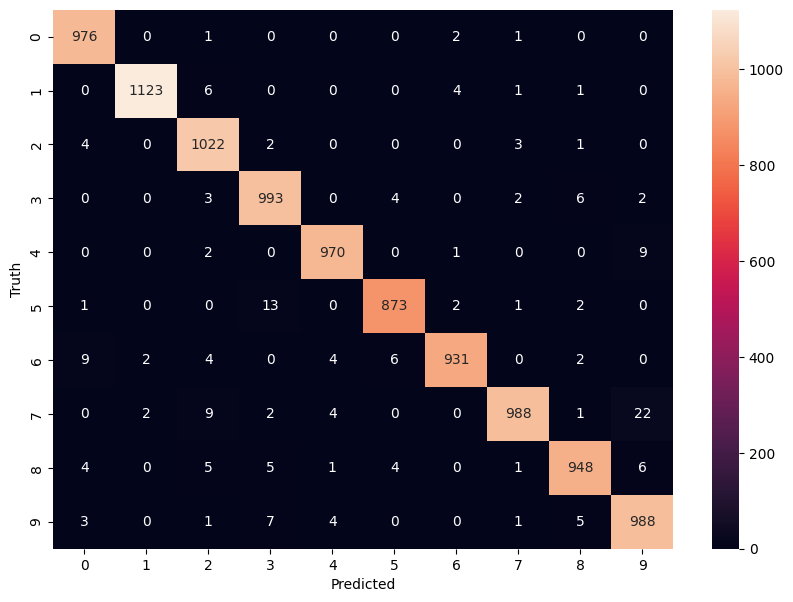

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')